# Практическое задание

В этом практическом задании мы поработаем с алгоритмом линейной регрессии и нормализацией признаков. Для начала загрузите данные из файла `data.csv`, который содержит 100 признаков f1, f2, ..., f100 и целевую переменную target. Для загрузки данных используете функцию `read_csv` из библиотеки `pandas`. Выделите матрицу признаков и целевую переменную из загруженных данных.

### *РЕШЕНИЕ*

In [124]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [126]:
data = pd.read_csv('data.csv')

In [127]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f92,f93,f94,f95,f96,f97,f98,f99,f100,target
0,-1.979019,0.392456,1.195177,0.209349,-1.209435,0.868798,0.384209,-0.426571,-0.977939,-1.419877,...,-1.587188,-0.612423,-0.281845,-0.625773,-0.907327,-0.800223,0.065892,0.271684,-0.201420,-45.587910
1,0.613518,0.051946,0.238789,-0.071601,-0.080717,1.727543,-0.483886,0.635172,0.038003,1.573987,...,0.059630,0.120031,0.399223,0.494030,0.197600,0.652323,0.916328,-1.556582,-0.370614,137.329473
2,0.444198,-0.535317,0.664927,-0.327017,1.935154,-1.776012,0.207803,0.126178,0.252569,0.889037,...,0.195482,1.384532,0.522251,-0.127655,-0.403076,-0.111509,-0.183150,0.977816,-1.171654,141.355900
3,-1.485186,-0.101987,0.817982,-0.846498,-0.660834,-0.073107,-0.247340,-0.775607,1.015937,-1.075737,...,0.753417,-0.403380,0.087974,-1.525572,2.404838,0.011863,0.994299,-2.152914,-0.213593,-65.882640
4,0.276582,-0.208468,0.185689,0.508608,-1.527168,-1.373403,-0.481766,-2.854627,1.868818,-1.179460,...,-0.985540,0.419706,-0.610858,0.209534,-0.538048,0.164295,-0.984655,-0.598438,-0.887770,-333.409221


In [128]:
X = data.iloc[:, :100]

In [130]:
y = data.iloc[:, 100:]

/Users/itrechyokas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/itrechyokas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


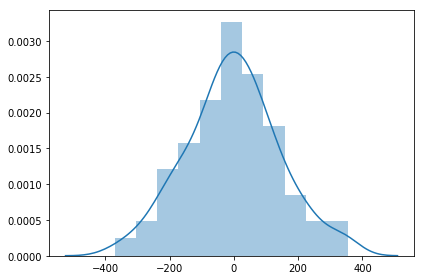

In [132]:
plt.figure(figsize=(6, 4))
sns.distplot(y)

plt.tight_layout()

Далее, разделите загруженный датасет на тренировочную и тестовую выборку. Для этого используйте функцию `train_test_split` из модуля `sklearn.model_selection` с параметрами `random_state=42` и `test_size=0.33`. Обучите линейную регрессию на тренировочных данных и оцените среднеквадратическую ошибку на тестовых данных. Один из вариантов линейной регрессии в `scikit-learn` представлен классом `Ridge` из `sklearn.linear_model`.
Используйте параметр `random_state=42` в конструкторе класса при создании его экземпляра. Оценку среднеквадратичной ошибки проведите с помощью функции `mean_squared_error` из модуля `sklearn.metrics`. В качестве ответа `answer1` приведите это значение округлённое с точностью до двух знаков.

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [134]:
linear_regression = Ridge(random_state=42)

In [135]:
model = linear_regression.fit(X_train, y_train)

In [136]:
predicted_y = model.predict(X_test)

In [154]:
predicted_y[:10]

array([[ -15.32270816],
       [-129.7391101 ],
       [ 102.22966322],
       [ 200.44003412],
       [-233.14913305],
       [  97.75088143],
       [ 244.27617319],
       [  99.87514912],
       [ 208.76555175],
       [-217.55127944]])

In [137]:
MSE = mean_squared_error(y_test, predicted_y)

In [138]:
MSE

4921.8297211737

In [139]:
answer1 = MSE

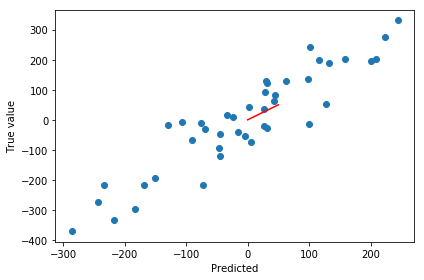

In [140]:
plt.figure(figsize=(6, 4))
plt.scatter(predicted_y, y_test)
plt.xlabel('Predicted')
plt.ylabel('True value')

plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()

### *РЕШЕНИЕ*

Далее вам предлагается нормализовать данные используя `StandardScaler` из `sklearn.preprocessing`. По своей сути операция нормализации в данном случае представляет из себя вычитание среднего из матрицы признаков и деление на среднеквадратическое отклонение. После этого, повторите процесс разбиения выборки на тренировочную и тестовую с теми же самыми параметрами и обучите линейную регрессию. Как изменилось качество на тестовых данных? Приведите значение среднеквадратической ошибки в качестве ответа `answer2` округлённое с точностью до двух знаков.

In [141]:
from sklearn.preprocessing import StandardScaler


In [161]:
scaler = StandardScaler()
scaler.fit(X)
X_train_norm = scaler.transform(X_train)

In [162]:
X_train[:1]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
9,1.392039,-0.664651,-1.42223,-1.941859,0.809265,-0.491562,-0.528947,0.856976,-0.516847,0.084094,...,-1.438411,0.958816,0.619033,-0.443263,-1.353755,1.212129,-0.432295,0.880066,0.357661,-1.499181


In [163]:
X_train_norm[:1]

array([[ 1.46204078, -0.65727072, -1.29125422, -1.96497924,  0.72438107,
        -0.50268867, -0.41952587,  0.79947005, -0.36967486,  0.1198013 ,
         2.7396327 ,  1.06255342, -0.10083888,  2.30815242,  0.46935348,
        -1.57898442, -1.67141489,  1.18268353,  0.11616593,  1.03900147,
        -0.41810647,  1.11973274, -0.13309712, -0.86706543, -0.23865188,
         1.26220931, -0.87017615,  0.09235458, -2.0952066 , -0.66531691,
         0.89757784,  1.31040741,  1.23710758, -0.13924324,  0.90339918,
         0.89224141,  0.13741326, -0.23264873,  1.28758523, -1.63309103,
        -0.22448689, -0.09273007, -0.34495566, -0.07737524,  0.15024374,
        -1.16964621, -0.05040262, -0.05100412,  1.34463463,  0.78259594,
         0.03439397,  1.83744008, -1.96963886, -0.80013039, -0.34229653,
         1.22351228, -1.29615972,  0.08028967, -1.13455697, -0.16417349,
         1.2000378 ,  0.76288218, -0.30184909,  2.03451142, -1.22878987,
        -0.9576799 , -0.01409889,  1.3889581 ,  1.0

In [164]:
model2 = linear_regression.fit(X_train_norm, y_train)

In [165]:
X_test_norm = scaler.transform(X_test)

In [166]:
predicted_y2 = model2.predict(X_test_norm)

In [167]:
predicted_y2[:10]

array([[ -14.03914333],
       [-126.50426079],
       [ 113.3786442 ],
       [ 192.52984504],
       [-218.84323781],
       [ 104.47208484],
       [ 238.53232017],
       [  98.09828176],
       [ 201.0751578 ],
       [-228.11165228]])

In [168]:
MSE2 = mean_squared_error(y_test, predicted_y2)

In [169]:
MSE2

4464.79246571916

In [170]:
answer2 = MSE2

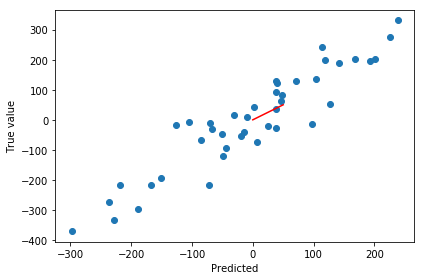

In [171]:
plt.figure(figsize=(6, 4))
plt.scatter(predicted_y2, y_test)
plt.xlabel('Predicted')
plt.ylabel('True value')

plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()

## Строка с ответами

In [172]:
print('mse 1: {0:.2f}\nmse 2: {1:.2f}'.format(answer1, answer2))

mse 1: 4921.83
mse 2: 4464.79
